In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
!pip install xgboost
import xgboost as xgb



# Reading data

In [2]:

df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

# Data Preprocessing and Feature Engineering

In [5]:
#  Finding missing values
missing_values=df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Converting values to numerical since total charges are object
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [10]:
missing_total_charges = df[df['TotalCharges'].isnull()]
print(missing_total_charges.head())


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                  

In [11]:
#Replacing with 0
df['TotalCharges'].fillna(0, inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_2872\1942817587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [12]:
missing_total_charges = df[df['TotalCharges'].isnull()]
print(missing_total_charges.head())


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [13]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


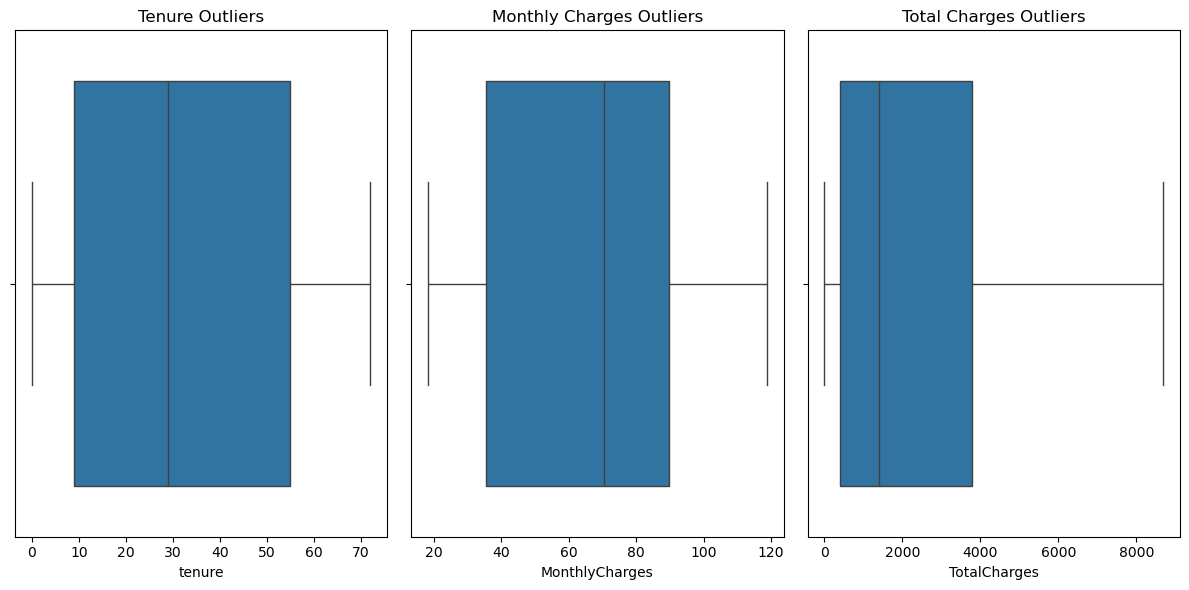

In [14]:
# Detecting outliers
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['tenure'])
plt.title('Tenure Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Monthly Charges Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['TotalCharges'])
plt.title('Total Charges Outliers')

plt.tight_layout()
plt.show()

In [15]:
# Feature scaling: Using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].head())

# Saving the cleaned dataset to a new CSV
df.to_csv('cleaned_telco_data.csv', index=False)

     tenure  MonthlyCharges  TotalCharges
0  0.013889        0.115423      0.003437
1  0.472222        0.385075      0.217564
2  0.027778        0.354229      0.012453
3  0.625000        0.239303      0.211951
4  0.027778        0.521891      0.017462


Using cleaned dataset

In [16]:
df = pd.read_csv('cleaned_telco_data.csv')

In [17]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'].replace({'No phone service': 'No'}))
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'].replace({'No internet service': 'No'}))
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'].replace({'No internet service': 'No'}))
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'].replace({'No internet service': 'No'}))
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'].replace({'No internet service': 'No'}))
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'].replace({'No internet service': 'No'}))
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'].replace({'No internet service': 'No'}))
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])  # Target variable

In [18]:
#Customer Id does not affect churn It is just to identify the customer
#Churn is to be predicted so we drop it from input features
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [19]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Feature scaling, To standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Model Selection and Training

In [22]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_metrics = evaluate_model(log_reg, X_test_scaled, y_test)


In [23]:
#Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
decision_tree_metrics = evaluate_model(decision_tree, X_test_scaled, y_test)

In [24]:
#Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
random_forest_metrics = evaluate_model(random_forest, X_test_scaled, y_test)
                                       

In [25]:
#Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_metrics = evaluate_model(svm, X_test_scaled, y_test)

In [26]:
#Xgboost
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train_scaled, y_train)
xgboost_metrics= evaluate_model(xgboost_model, X_test_scaled, y_test)

D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Model Evaluation

In [27]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','XGB']
metrics = [log_reg_metrics, decision_tree_metrics, random_forest_metrics, svm_metrics, xgboost_metrics]


In [28]:
print("Model Evaluation Metrics:")
print(f"{'Model':<20}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}")
for i, metric in enumerate(metrics):
    print(f"{models[i]:<20}{metric[0]:<10.4f}{metric[1]:<10.4f}{metric[2]:<10.4f}{metric[3]:<10.4f}")

Model Evaluation Metrics:
Model               Accuracy  Precision Recall    F1-Score  
Logistic Regression 0.8102    0.6798    0.5697    0.6199    
Decision Tree       0.7274    0.4982    0.4843    0.4912    
Random Forest       0.7937    0.6667    0.4808    0.5587    
SVM                 0.8027    0.6948    0.4878    0.5732    
XGB                 0.7889    0.6368    0.5192    0.5720    


Here, the Accuracy,Precision, Recall, F1-Score of Logistic regression is more than Random Forest
But logistic regression assumes linear relationship between features and Random Forest can model non-linear relationship
If we want simplicity we will choose Logistic regression. If we want model to handle complex interactions then we will choose Random Forest. 




Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.48      0.56       574

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



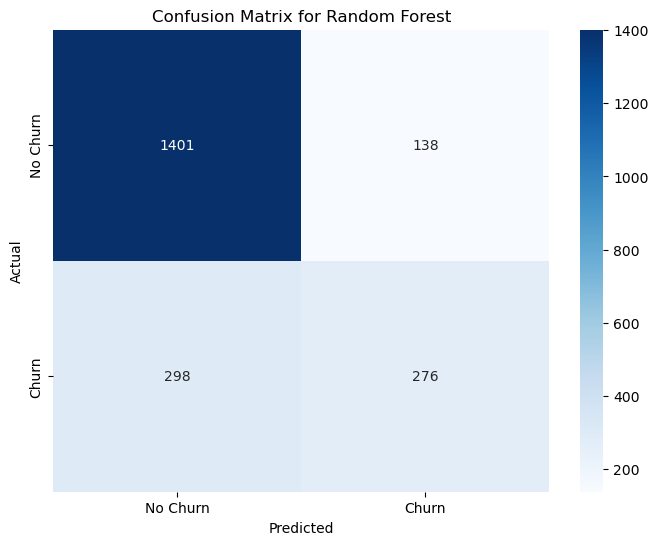

In [29]:
print("\nClassification Report for Random Forest:")
y_pred_rf = random_forest.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for  model
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



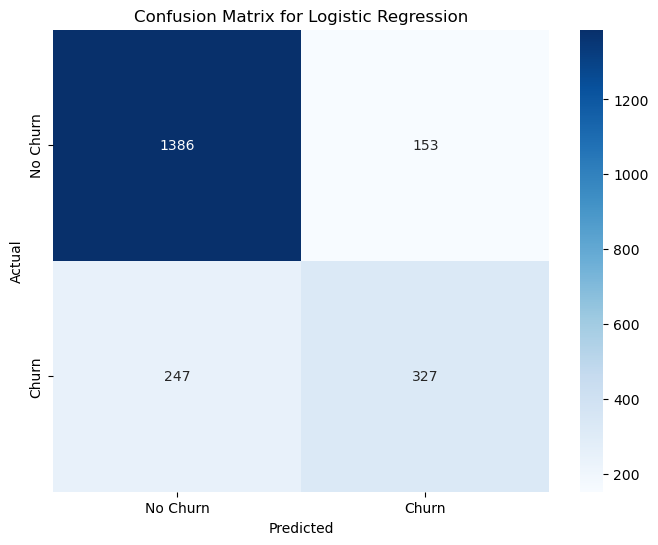

In [133]:
print("\nClassification Report Logistic Regression:")
y_pred_lr = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

# Confusion matrix for model
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Conclusion:We will use Logistic regression for this purpose since it has best accuracy. We can also use Random forest or XGBoost if we have complex relationships